# <u>Machine Learning Project</u>

## Data Exploration

<b>we will first import pandas, a python data analysis library, import 
the data from the csv file using pandas, and begin exploring the data.</b>

In [285]:
import pandas as pd

In [286]:
teams = pd.read_csv("teams.csv")

In [287]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


<b>there are extra, unneeded columns. These will be removed.</b>

In [288]:
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [289]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


<b>before moving on, we should look to see if it is possible to make 
predictions, so we will look for correlation between medals column and 
other columns</b>

In [290]:
teams.corr(numeric_only=True)["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

<b>when using linear regression, we want to see strong correlation between
the column that were trying to predict and the columns that were using 
to make the prediction.</b>

we can see from the previous function call that there is strong correlation
for athletes and previous medals. this this shows us that we can use these
columns.

<b>we are going to look at how the columns visually look, using seaborn.
matplotlib.pyplot.show() must be used in this case to display the seaborn graph.</b>

fit regression will be true, which will fit a nice regression line. we will 
also say ci is none. if we dont say ci is none, then seaborn will give us 
a confidence interval around the line, which is not wanted.

In [291]:
import seaborn as sns
from matplotlib import pyplot as plt

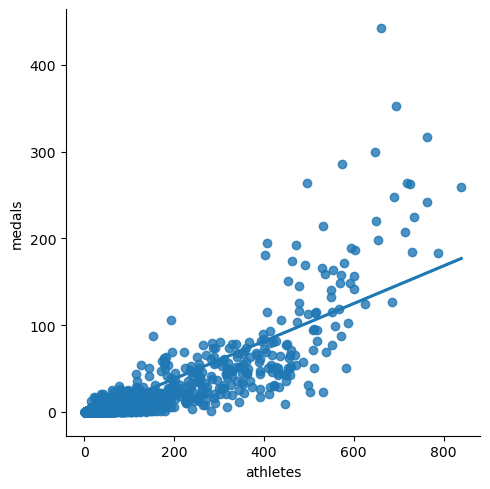

In [292]:
sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True, ci=None)
plt.show()

we can see that the number of medals goes up along with the number of 
athletes. this makes sense, as if you only have 1 athlete the most 
amount of medals you can win is 1, and if you have more athletes, you
can win more medals.

<b>next, we will look at a column where there isn't a strong correlation.
we will look at age.</b>

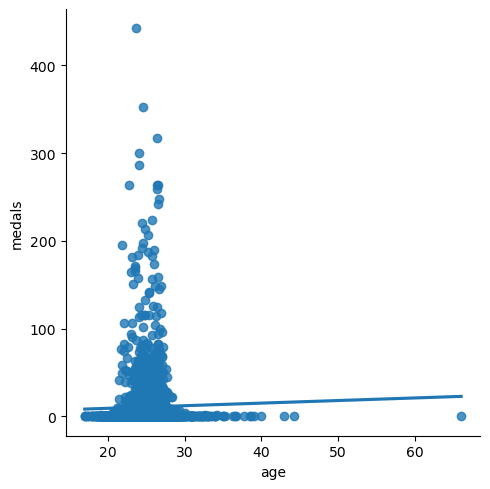

In [293]:
sns.lmplot(data=teams, y="medals", x="age", fit_reg=True, ci=None)
plt.show()

you can see that, as age increases, the number of medals really dont increase.
there could be a non-linear correlation here. if age is between 20 and 30, the
numbers could be high. we will not be using age as a predictor in our 
linear regression model.

<b>the last bit of exploration that we will do is to make a histogram
to look at how many countries fall into each section for number of 
medals earned.</b>

we will use pandas.data.plot to make the histogram, and, once again, we must use matplotlib.pyplot.show() to show the graph.

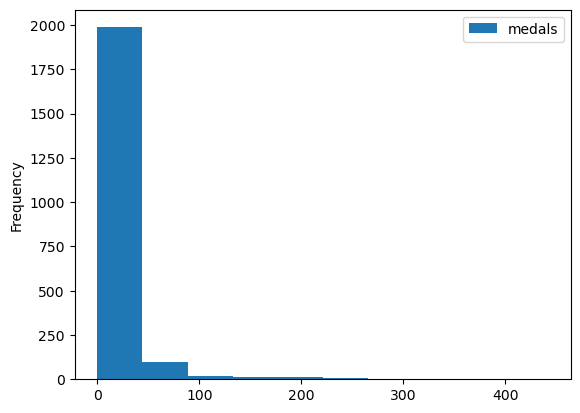

In [294]:
teams.plot.hist(y="medals")
plt.show()

almost 2000 countries have earned between 0 and 50 medals. there are very few countries that have earned more than that. this means our data is unbalanced, and may change the usefulness of our project.

## Data Cleaning

<b>find any rows that have missing values.</b>

In [295]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


130 rows have missing values

<b>we will now drop any rows that have missing values.</b>

In [296]:
teams = teams.dropna()

In [297]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


2144 rows shown at the beginning minus the current 2014 rows equals the 130 rows with missing values. we have removed the rows with missing values.

## Data Splitting

<b>because this data is time-series data, we want to split it in a way that respects that. we want to take the last 2 years of data (2012 & 2016) and put it in our test data set, and we want to put the rest of the data in our train data set.</b>

we are doing this because in the real world if we're trying to predict who will win the most medals in 2024, we dont have data from 2028, we only have data from the past. we want to respect the order of the data.

In [298]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

we want to train our model on one set, and then use another set to evaluate how well the model is doing.

<b>now, we want to see the size of the data sets.</b>

it is somewhat close to 80/20. some people choose to have 80/20 as a default.

In [299]:
train.shape

(1609, 7)

In [300]:
test.shape

(405, 7)

## Training the Model

earlier, we picked mean absolute error as our error metric. we will use that metric to evaluate our model after training.

<b>we will use scikit-learn, a machine learning library, to train our model. The LinearRegression class will allow us to train and make predictions.</b>

initialize our LinearRegression class here. we will use predictors to predict our target.

In [301]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [302]:
predictors = ["athletes", "prev_medals"]
target = "medals"

<b>we will call the fit method to fit our linear regression model.</b> 

we will pass in the columns from the training dataset that we want to use as predictors.

In [303]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

now that we have fit our model we can use it to make predictions.

<b>we will call the predict method of our linear regression class.</b>

we will only pass in the predictors. we are not sending in the actual values. we want predictions without the model knowing what the actual answers are.

In [304]:
predictions = reg.predict(test[predictors])

In [305]:
# this is a numpy array
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

these values are not rounded. we are trying to predict how many medals a country can win. countries can only win whole medals, not parts of a medal. some numbers are also negative. countries cannot win negative medals. so, we will do some correction to prevent negatives and round numbers.

<b>first, we will assign our predictions in a column in our test dataframe.</b>

this will allow us to view our predictions more easily.

In [306]:
test["predictions"] = predictions

In [307]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


<b>second, we will now replace all negative values in the prediction column with a zero.</b>

this is the pandas.DataFrame.loc() method, which does the following: Access a group of rows and columns by label(s) or a boolean array.

In [308]:
test.loc[test["predictions"] < 0, "predictions"] = 0

<b>third, we will round the predictions.</b>

In [309]:
test["predictions"] = test["predictions"].round()

In [310]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


## Mean Absolute Error

we will get a number back indicating our mean absolute error.

In [311]:
from sklearn.metrics import mean_absolute_error

In [312]:
error = mean_absolute_error(test["medals"], test["predictions"])

In [313]:
error

3.2987654320987656

this means that we are, on average, within 3.3 medals of how much a team actually won in the olympics.

<b>now, let's do a sanity check the medals column</b>

We will use the describe() method. this is essentially a sanity check. you want to make sure that your error is below the standard deviation. if you error is above the standard deviation, usually something is wrong. perhaps you are using predictors that do not give you any useful information to predict the target, or you messed something up with your model.

In [314]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

this seems to be ok. our error is below our standard deviation.

<b>next, lets look team by team to see how our predictions look in different countries.</b>

In [315]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [316]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


we can see here that for india in 2016, our prediction is off by quite a lot. we are now going to see how we are doing on a country by country basis.

In [317]:
# finding the absolute error
errors = (test["medals"] - test["predictions"]).abs()

errors, below, shows the difference between rounded predicted medals and actual medals

In [318]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [319]:
# grouping by team
error_by_team = errors.groupby(test["team"]).mean()

In [320]:
# we will now show how many medals off we were on average for each country
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [324]:
# this will tell us how many medals each country earned on average
medals_by_team = test["medals"].groupby(test["team"]).mean()

In [325]:
# this will show us the ratio of our errors
error_ratio = error_by_team / medals_by_team

In [323]:
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [326]:
# here we take only values that are not missing
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [329]:
# we need to clean up our infinite values now
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

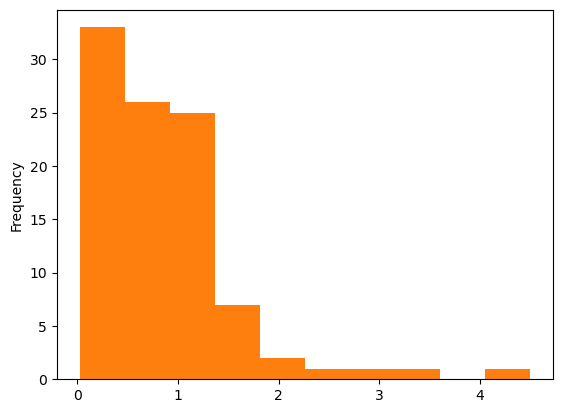

In [331]:
# after having removed our null and infinite values,
# we will create a histogram
# an error ratio between 0 and 0.5 means that you are within 50% of the 
# actual medal count
# but, sometimes we have an error ratio above 2 and above, which would mean
# that our predictions were twice as high as the actual medals.
error_ratio.plot.hist()
plt.show()

In [332]:
# for countries that send a lot of athletes to the olympics, our error
# ratio is pretty good. 
# for countries that do not send a lot of athletes to the olympics, our
# ratio is quite high.
# for countries that send a lot of athletes to the olympics, our model would
# do quite well
# we can see this with the following code
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64

potential things to add to this project
1. add in more predictors
2. try different machine learning models, such as random forest or neural network
3. build a model from a different dataset
4. reshape different columns using different mathmatical transformations to see if it creates a more linear correlation
5. measure the error more predictably - could build a backtesting system or another kind of system that measures data across the whole dataset. you could train a model for different kinds of country, high medal vs low medal count.